In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data.csv", encoding="latin1")
df = df[df["ID"] > 60]
df.rename(columns={'Ethical technology assessment?':'Ethical technology assessment'}, inplace=True)

bach = df[df['program'] == 'bachelor']
mast = df[df['program'] == 'master']

b_aal = bach[bach['campus'] == 'AAL']
m_aal = mast[mast['campus'] == 'AAL']

b_cph = bach[bach['campus'] == 'CPH']
m_cph = mast[mast['campus'] == 'CPH']

esb = df[df['campus'] == 'ESB']

In [3]:
col1 = 'Select 3 workshops in a prioritised order, where 1 is the workshop you want to attend the most4'
col2 = 'Select 3 workshops in a prioritised order, where 1 is the workshop you want to attend the most5'
col3 = 'Select 3 workshops in a prioritised order, where 1 is the workshop you want to attend the most6'

cursos_b_aal = list(set(b_aal[col1]) | set(b_aal[col2]) | set(b_aal[col3]))
cursos_m_aal = list(set(m_aal[col1]) | set(m_aal[col2]) | set(m_aal[col3]))

pref_b_aal = b_aal[cursos_b_aal]
pref_m_aal = m_aal[cursos_m_aal]

In [4]:
def count_pref(data):

    cp1 = {}
    cp2 = {}
    cp3 = {}

    for col in data.columns:
        cp1[col] = int(data[col].value_counts().get(1.0, 0))
        cp2[col] = int(data[col].value_counts().get(2.0, 0))
        cp3[col] = int(data[col].value_counts().get(3.0, 0))

    return cp1, cp2, cp3

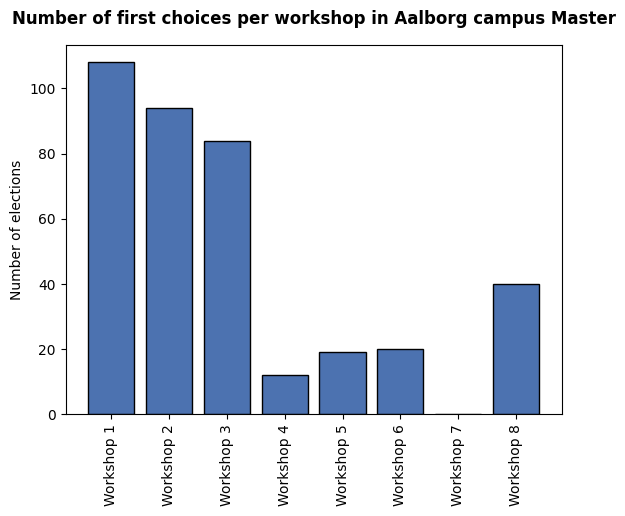

In [5]:
m_aal_1,m_aal_2,m_aal_3 = count_pref(pref_m_aal)
plt.bar(['Workshop ' + str(i + 1) for i in range(8)], m_aal_1.values(), color="#4C72B0", edgecolor="black")
plt.xticks(rotation=90)
plt.title("Number of first choices per workshop in Aalborg campus Master",fontsize=12, weight="bold", pad=15)
plt.ylabel("Number of elections")
plt.show()

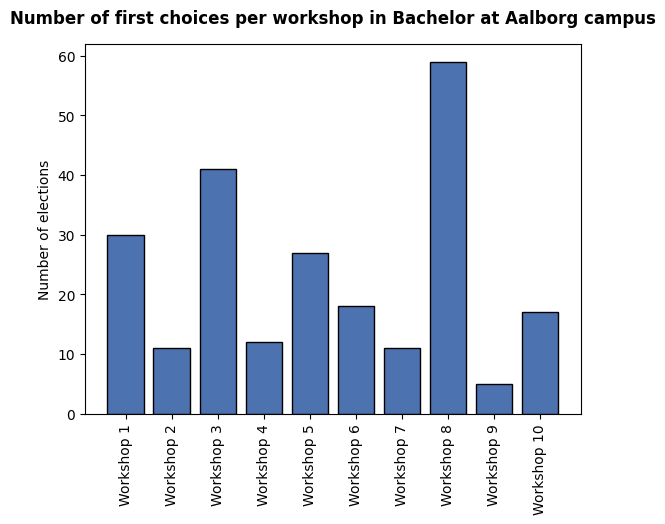

In [6]:
b_aal_1,b_aal_2,b_aal_3 = count_pref(pref_b_aal)
plt.bar(['Workshop ' + str(i + 1) for i in range(10)], b_aal_1.values(), color="#4C72B0", edgecolor="black")
plt.xticks(rotation=90)
plt.title("Number of first choices per workshop in Bachelor at Aalborg campus",fontsize=12, weight="bold", pad=15)
plt.ylabel("Number of elections")
plt.show()

C:\Users\tatyf\AppData\Local\Temp\ipykernel_10340\1572001872.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=90)
C:\Users\tatyf\AppData\Local\Temp\ipykernel_10340\1572001872.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=90)
C:\Users\tatyf\AppData\Local\Temp\ipykernel_10340\1572001872.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=90)


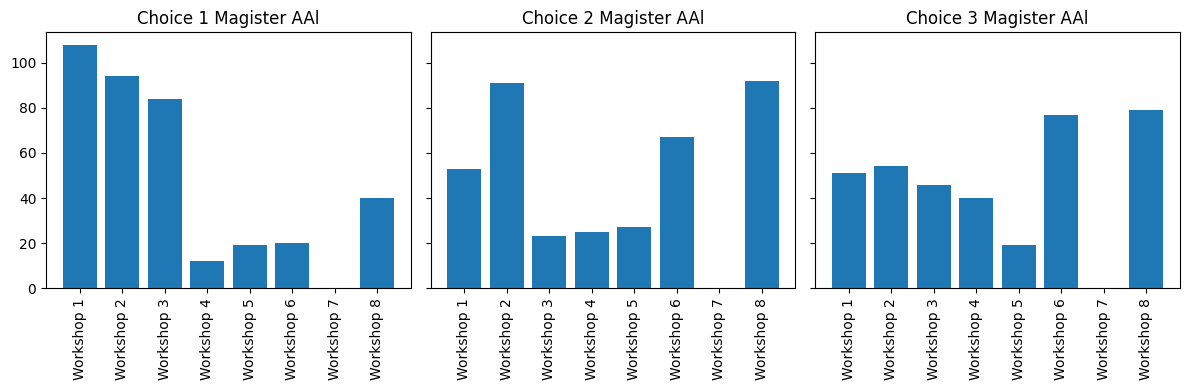

In [7]:
dicts = [m_aal_1, m_aal_2, m_aal_3]
titles = ["Choice 1 Magister AAl", "Choice 2 Magister AAl", "Choice 3 Magister AAl"]

fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharey=True)

for ax, d, title in zip(axes, dicts, titles):
    labels = ['Workshop ' + str(i + 1) for i in range(len(d))]
    values = list(d.values())
    
    ax.bar(labels, values)
    ax.set_xticklabels(labels, rotation=90)
    ax.set_title(title)

plt.tight_layout()
plt.show()

In [8]:
def aux_fun(n):
    if n == 1 or n == 2 or n == 3:
        return 1
    return 0

def prod_esp(col1, col2):
    col1 = col1.apply(aux_fun)
    col2 = col2.apply(aux_fun)
    return col1.dot(col2)

def get_matrix(data):
    mat = []
    for i in data.columns:
        fila = []
        for j in data.columns:
            fila.append(prod_esp(data[i], data[j]))
            if i == j:
                fila[-1] = 0
        mat.append(fila)
    return np.array(mat)

In [9]:
mat_b_aal = get_matrix(pref_b_aal)
mat_m_aal = get_matrix(pref_m_aal)

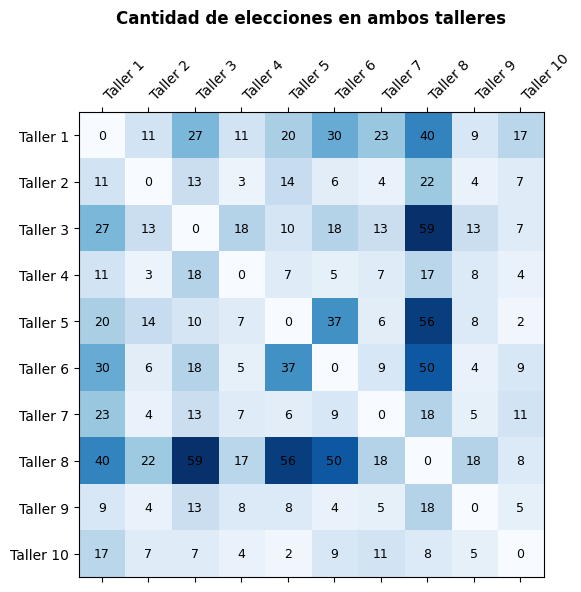

In [10]:
mat = mat_b_aal
plt.figure(figsize=(6,6))
plt.matshow(mat, cmap="Blues", fignum=1)
plt.title("Cantidad de elecciones en ambos talleres", pad=20, fontsize=12, weight="bold")

n_filas, n_cols = mat.shape
plt.xticks(range(n_cols), [f"Taller {j+1}" for j in range(n_cols)], rotation=45, ha="left")
plt.yticks(range(n_filas), [f"Taller {i+1}" for i in range(n_filas)])
for (i, j), val in np.ndenumerate(mat): plt.text(j, i, f"{val}", ha="center", va="center", fontsize=9, color="black")

plt.show()